In [17]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist # dataset: 28x28 bilder av handskrivna siffror 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data() #Lägger in siffrorna i träning och test variablar

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential() #"feedforward model" ett linjärt nätverk
model.add(tf.keras.layers.Flatten()) #input-lager
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #hidden layer, 128 neuroner. Aktivationsfunktion = relu
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #ett till av ett likadant gömda-lager 
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #10 output-neuroner för 10 svar (0-9) 

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']) #adam som optimizer scc som loss-funktion

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 17s 285us/step - loss: 0.2624 - acc: 0.9229
Epoch 2/10
60000/60000 [==============================] - 16s 262us/step - loss: 0.1070 - acc: 0.9679
Epoch 3/10
60000/60000 [==============================] - 16s 262us/step - loss: 0.0732 - acc: 0.9772
Epoch 4/10
60000/60000 [==============================] - 16s 261us/step - loss: 0.0556 - acc: 0.9822
Epoch 5/10
60000/60000 [==============================] - 16s 262us/step - loss: 0.0413 - acc: 0.9871
Epoch 6/10
60000/60000 [==============================] - 16s 262us/step - loss: 0.0328 - acc: 0.9893
Epoch 7/10
60000/60000 [==============================] - 16s 262us/step - loss: 0.0257 - acc: 0.9914
Epoch 8/10
60000/60000 [==============================] - 16s 262us/step - loss: 0.0209 - acc: 0.9928
Epoch 9/10
60000/60000 [==============================] - 16s 263us/step - loss: 0.0192 - acc: 0.9932
Epoch 10/10
60000/60000 [==============================] - 16s 262us/step - loss: 

In [18]:
val_loss, val_acc = model.evaluate(x_test, y_test) #Man ska hoppas på att modellen generaliserar hur olika siffror ser ut och inte momorizerar din specifika data.
print(val_loss, val_acc) #testar för overfitting

10000/10000 [==============================] - 1s 83us/step
0.10595423035811545 0.974


In [19]:
import matplotlib.pyplot as plt #gör så jag kan se bilderna 
 
plt.imshow(x_train[0])
plt.show()
print(x_train[0])

<Figure size 640x480 with 1 Axes>

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [22]:
predictions = new_model.predict([x_test]) #en "predict" model för att kunna visa vad nätverk svarar.

In [23]:
print(predictions) #Det här är arrays som är probabilitet distribution. 
#Inte så lätt att tolka så vi måste transformera dessa nummer.

[[6.1817643e-12 8.7812965e-13 1.3179487e-06 ... 9.9999845e-01
  2.5655895e-12 6.5197956e-13]
 [2.0302542e-21 6.2686880e-08 9.9999988e-01 ... 2.6643605e-17
  3.7146745e-13 7.5137790e-23]
 [2.1826184e-15 1.0000000e+00 1.8065550e-10 ... 4.5360910e-08
  2.1553663e-09 1.0713993e-12]
 ...
 [3.8469276e-15 2.5657085e-10 2.4804964e-15 ... 2.9313456e-09
  6.2134929e-11 2.9593799e-08]
 [1.2125072e-13 2.3861889e-14 8.1665349e-13 ... 1.4786958e-11
  5.0220340e-05 1.8900705e-17]
 [8.5970056e-14 4.7980920e-12 3.2227319e-15 ... 6.2829706e-16
  2.3500104e-12 7.6047371e-18]]


In [33]:
import numpy as np #numpy används för att kunna tolka arrayerna ovan.

print(np.argmax(predictions[2019])) #testsettet har 10000 handskrivna nummer 0-9. Vår modell tror att nummer 2019 är en 9

9


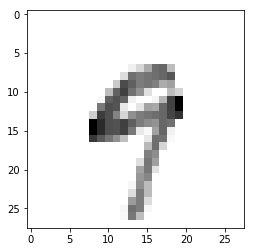

In [35]:
plt.imshow(x_test[2019], cmap = plt.cm.binary) #Detta gör så att den handskrivna siffran kan visas 
plt.show()